In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
#importing both the datasets into 2 different dataframes
df1 = pd.read_csv("Assignment 4 Dataset 1 (1205).csv")
df2 = pd.read_csv("Assignment 4 Dataset 2 (1205).csv")

## Data Cleansing of 1st Dataset

In [3]:
df1.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  10/19/2018   
1  Entire home/apt    225               1                 45   5/21/2019   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  07-05-2019   
4  Entire home/apt     80              10                  9  11/19/2018   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

As we can see that the 'last_review' column contains date values. But the dates are not in a proper format and also contains the null values.

In [4]:
#Checking columns containing null values
df1.columns[df1.isna().any().tolist()]

Index(['last_review', 'reviews_per_month'], dtype='object')

In [5]:
#converting the date values of 'last_review' column into datetime format
df1['last_review'] = pd.to_datetime(df1['last_review'])

#filling the null values of 'last_review' column with the previous non NaN value
df1['last_review'].fillna(method='ffill', inplace=True)

In [6]:
#counting the number of null values in 'reviews_per_month' column
cnt=0
for i in df1['reviews_per_month'].isna():
    if i == True:
        cnt+=1
cnt

7

In [7]:
#Another way to check the number of null values present in a dataframe/column
df1['reviews_per_month'].isnull().sum().sum()

7

In [8]:
#filling the missing values with the mean value of 'reviews_per_month' column
df1['reviews_per_month'] = df1['reviews_per_month'].fillna(value=df1['reviews_per_month'].mean())

In [9]:
df1['last_review'].isna().sum()

0

In [10]:
df1['reviews_per_month'].isna().sum()

0

In [11]:
df1.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0  2019-05-21   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0           0.210000                               6               365  
1           0.380000                               2               355  
2           1.091653                               1               365  
3           4.640000                               1               194  
4           0.100000                               1                 0

## Data Cleansing of 2nd Dataset

In [12]:
df2.head()

Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0     Wilson K Adinolfi  10026          0                0         1   
1  Sidi Karthikeyan Ait  10084          1                1         1   
2      Sarah Akinkuolie  10196          1                1         0   
3          Trina Alagbe  10088          1                1         0   
4        Carol Anderson  10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5            3                       0   50825  ...   

      ManagerName  ManagerID RecruitmentSource PerformanceScore  \
0  Michael Albert       22.0          LinkedIn          Exceeds   
1      Simon Roup        4.0            Indeed      Fully Meets   
2  Kissy Sullivan       20.0          LinkedIn      Fully Meets   
3    Elijiah Gray       16.0            Indeed      Fully Meets   
4  Webster Butler       39.0     Google Search      Fully Meets   

   EngagementSurvey EmpSatisfaction SpecialProjectsCount  \
0              4.60               5                    0   
1              4.96               3                    6   
2              3.02               3                    0   
3              4.84               5                    0   
4              5.00               4                    0   

  LastPerformanceReview_Date DaysLateLast30 Absences  
0                  1/17/2019              0        1  
1                  2/24/2016              0       17  
2                  5/15/2012              0        3  
3                 01-03-2019              0       15  
4                 02-01-2016              0        2  

[5 rows x 36 columns]

We need to convert the date columns 'DOB' and 'LastPerformanceReview_Date' and 'DateofTermination' in a proper format.

In [13]:
#Checking columns containing null values
df2.columns[df2.isna().any()].tolist()

['DateofTermination', 'ManagerID']

In [14]:
df2['DOB'] = pd.to_datetime(df2['DOB'])
df2['LastPerformanceReview_Date'] = pd.to_datetime(df2['LastPerformanceReview_Date'])
df2['DateofHire'] = pd.to_datetime(df2['DateofHire'])

In [15]:
#Number of null values present in 'ManagerID' column
df2['ManagerID'].isna().sum()

8

In [16]:
#Number of null values present in 'DateofTermination' column
df2['DateofTermination'].isna().sum()

207

In [17]:
#filling null values with scalar value of 39 as all null values comes under ManagerName = 'Webster Butler' having ID=39
df2['ManagerID'] = df2['ManagerID'].fillna(value=39)

In [18]:
#dropping the 'DateofTermination' column as it contains more than 60% null values
df2.dropna(axis=1, inplace=True)

In [19]:
df2.columns[df2.isna().any()].tolist()

[]

In [20]:
df2.dtypes

Employee_Name                         object
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                              object
State                                 object
Zip                                    int64
DOB                           datetime64[ns]
Sex                                   object
MaritalDesc                           object
CitizenDesc                           object
HispanicLatino                        object
RaceDesc                              object
DateofHire                    datetime64[ns]
TermReason

In [21]:
#converting the ManagerID datatype to int
df2['ManagerID'] = df2['ManagerID'].astype(int)

In [22]:
df2['ManagerID'].dtype

dtype('int32')

In [23]:
df2.head()

Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0     Wilson K Adinolfi  10026          0                0         1   
1  Sidi Karthikeyan Ait  10084          1                1         1   
2      Sarah Akinkuolie  10196          1                1         0   
3          Trina Alagbe  10088          1                1         0   
4        Carol Anderson  10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5            3                       0   50825  ...   

      ManagerName  ManagerID RecruitmentSource PerformanceScore  \
0  Michael Albert         22          LinkedIn          Exceeds   
1      Simon Roup          4            Indeed      Fully Meets   
2  Kissy Sullivan         20          LinkedIn      Fully Meets   
3    Elijiah Gray         16            Indeed      Fully Meets   
4  Webster Butler         39     Google Search      Fully Meets   

   EngagementSurvey EmpSatisfaction SpecialProjectsCount  \
0              4.60               5                    0   
1              4.96               3                    6   
2              3.02               3                    0   
3              4.84               5                    0   
4              5.00               4                    0   

  LastPerformanceReview_Date DaysLateLast30 Absences  
0                 2019-01-17              0        1  
1                 2016-02-24              0       17  
2                 2012-05-15              0        3  
3                 2019-01-03              0       15  
4                 2016-02-01              0        2  

[5 rows x 35 columns]

# Data Visualization of dataset 1

### 1. Bar graph

I have created a bar graph representing the average price of hotels according to the room types. 
It is observed that the 'shared room' category has the lowest price and the 'entire home / apartment' category has the highest price. 
A user can analyse the graph to check which category of rooms is in his/her budget.

In [24]:
df1_g = df1.groupby(by='room_type').mean()

In [25]:
df1_g.reset_index(inplace=True)
df1_g

room_type            id        host_id   latitude  longitude  \
0  Entire home/apt  33467.097015  129493.223881  40.727663 -73.966835   
1     Private room  28864.814159  174618.451327  40.733165 -73.960328   
2      Shared room  33250.500000  131566.000000  40.739745 -73.986955   

        price  minimum_nights  number_of_reviews  reviews_per_month  \
0  188.574627       11.559701          89.798507           0.961281   
1   92.345133        5.442478         119.477876           1.248760   
2   72.500000        3.500000         112.000000           0.950000   

   calculated_host_listings_count  availability_365  
0                        1.462687        172.119403  
1                        2.053097        228.504425  
2                        2.500000        275.500000

In [26]:
# plot area
fig = plt.figure(figsize=(5,5))

# axes
axes = fig.add_axes([0,0,1,0.8])
axes.set_xlabel('Room type', color='#0d00af')
axes.set_ylabel('Average Price in US dollars', color='#0d00af')
axes.set_title('Average Price as per room type')

# bar plot
plt.bar(x=df1_g['room_type'], height=df1_g['price'], color='brown', edgecolor='black')
plt.show()

## 2. Scatter plot 

In this plot I have represented the number of reviews of hotels against the years. It has been oberved that the maximum reviews were given in the year 2019.

In [27]:
import datetime as dt

In [28]:
df1['last_review_year'] = df1['last_review'].dt.strftime('%Y')

In [29]:
#creating a dataframe containing the review year
df1_y = df1[['last_review_year', 'number_of_reviews']]
df1_y

last_review_year  number_of_reviews
0               2018                  9
1               2019                 45
2               2019                  0
3               2019                270
4               2018                  9
..               ...                ...
244             2019                171
245             2019                 92
246             2019                238
247             2019                 56
248             2019                111

[249 rows x 2 columns]

In [30]:
# Adding marker, markersize and linestyle arguments
df1_y.sort_values('last_review_year', inplace=True)

fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])

ax1.scatter(x=df1_y['last_review_year'], y=df1_y['number_of_reviews'])

plt.show()

C:\Users\kpard\AppData\Local\Temp\ipykernel_23392\557307860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_y.sort_values('last_review_year', inplace=True)


## 3. Box Plot

The below box plot represents the number of ratings based on 5 different neighbourhood groups

In [31]:
Brooklyn = df1[df1['neighbourhood_group']=='Brooklyn']['number_of_reviews']
Manhattan = df1[df1['neighbourhood_group']=='Manhattan']['number_of_reviews']
Bronx = df1[df1['neighbourhood_group']=='Bronx']['number_of_reviews']
Queens = df1[df1['neighbourhood_group']=='Queens']['number_of_reviews']
Staten_Island = df1[df1['neighbourhood_group']=='Staten Island']['number_of_reviews']

In [32]:
data = [Brooklyn, Manhattan, Bronx, Queens, Staten_Island]

In [33]:
fig = plt.figure(figsize = (5,5))

ax1 = fig.add_axes([0,0,1,1])

ax1.boxplot(data, labels=['Brooklyn', 'Manhattan', 'Bronx', 'Queens', 'Staten_Island'])

plt.show()

## 4. Violin Plot

The below box plot represents the number of ratings based on 5 different neighbourhood groups

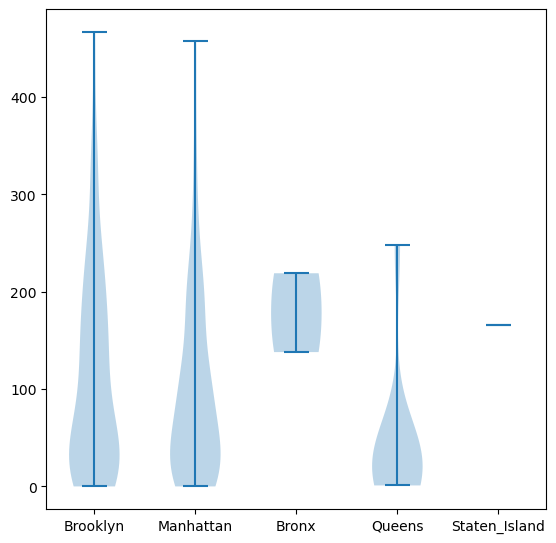

In [34]:
fig = plt.figure(figsize = (5,5))
ax1 = fig.add_axes([0,0,1,1])

ax1.violinplot(data)

plt.xticks([1,2,3,4,5],['Brooklyn', 'Manhattan', 'Bronx', 'Queens', 'Staten_Island'])

plt.show()

## 5. Histogram 

Below histograms represents distribution of all the features in dataset 1

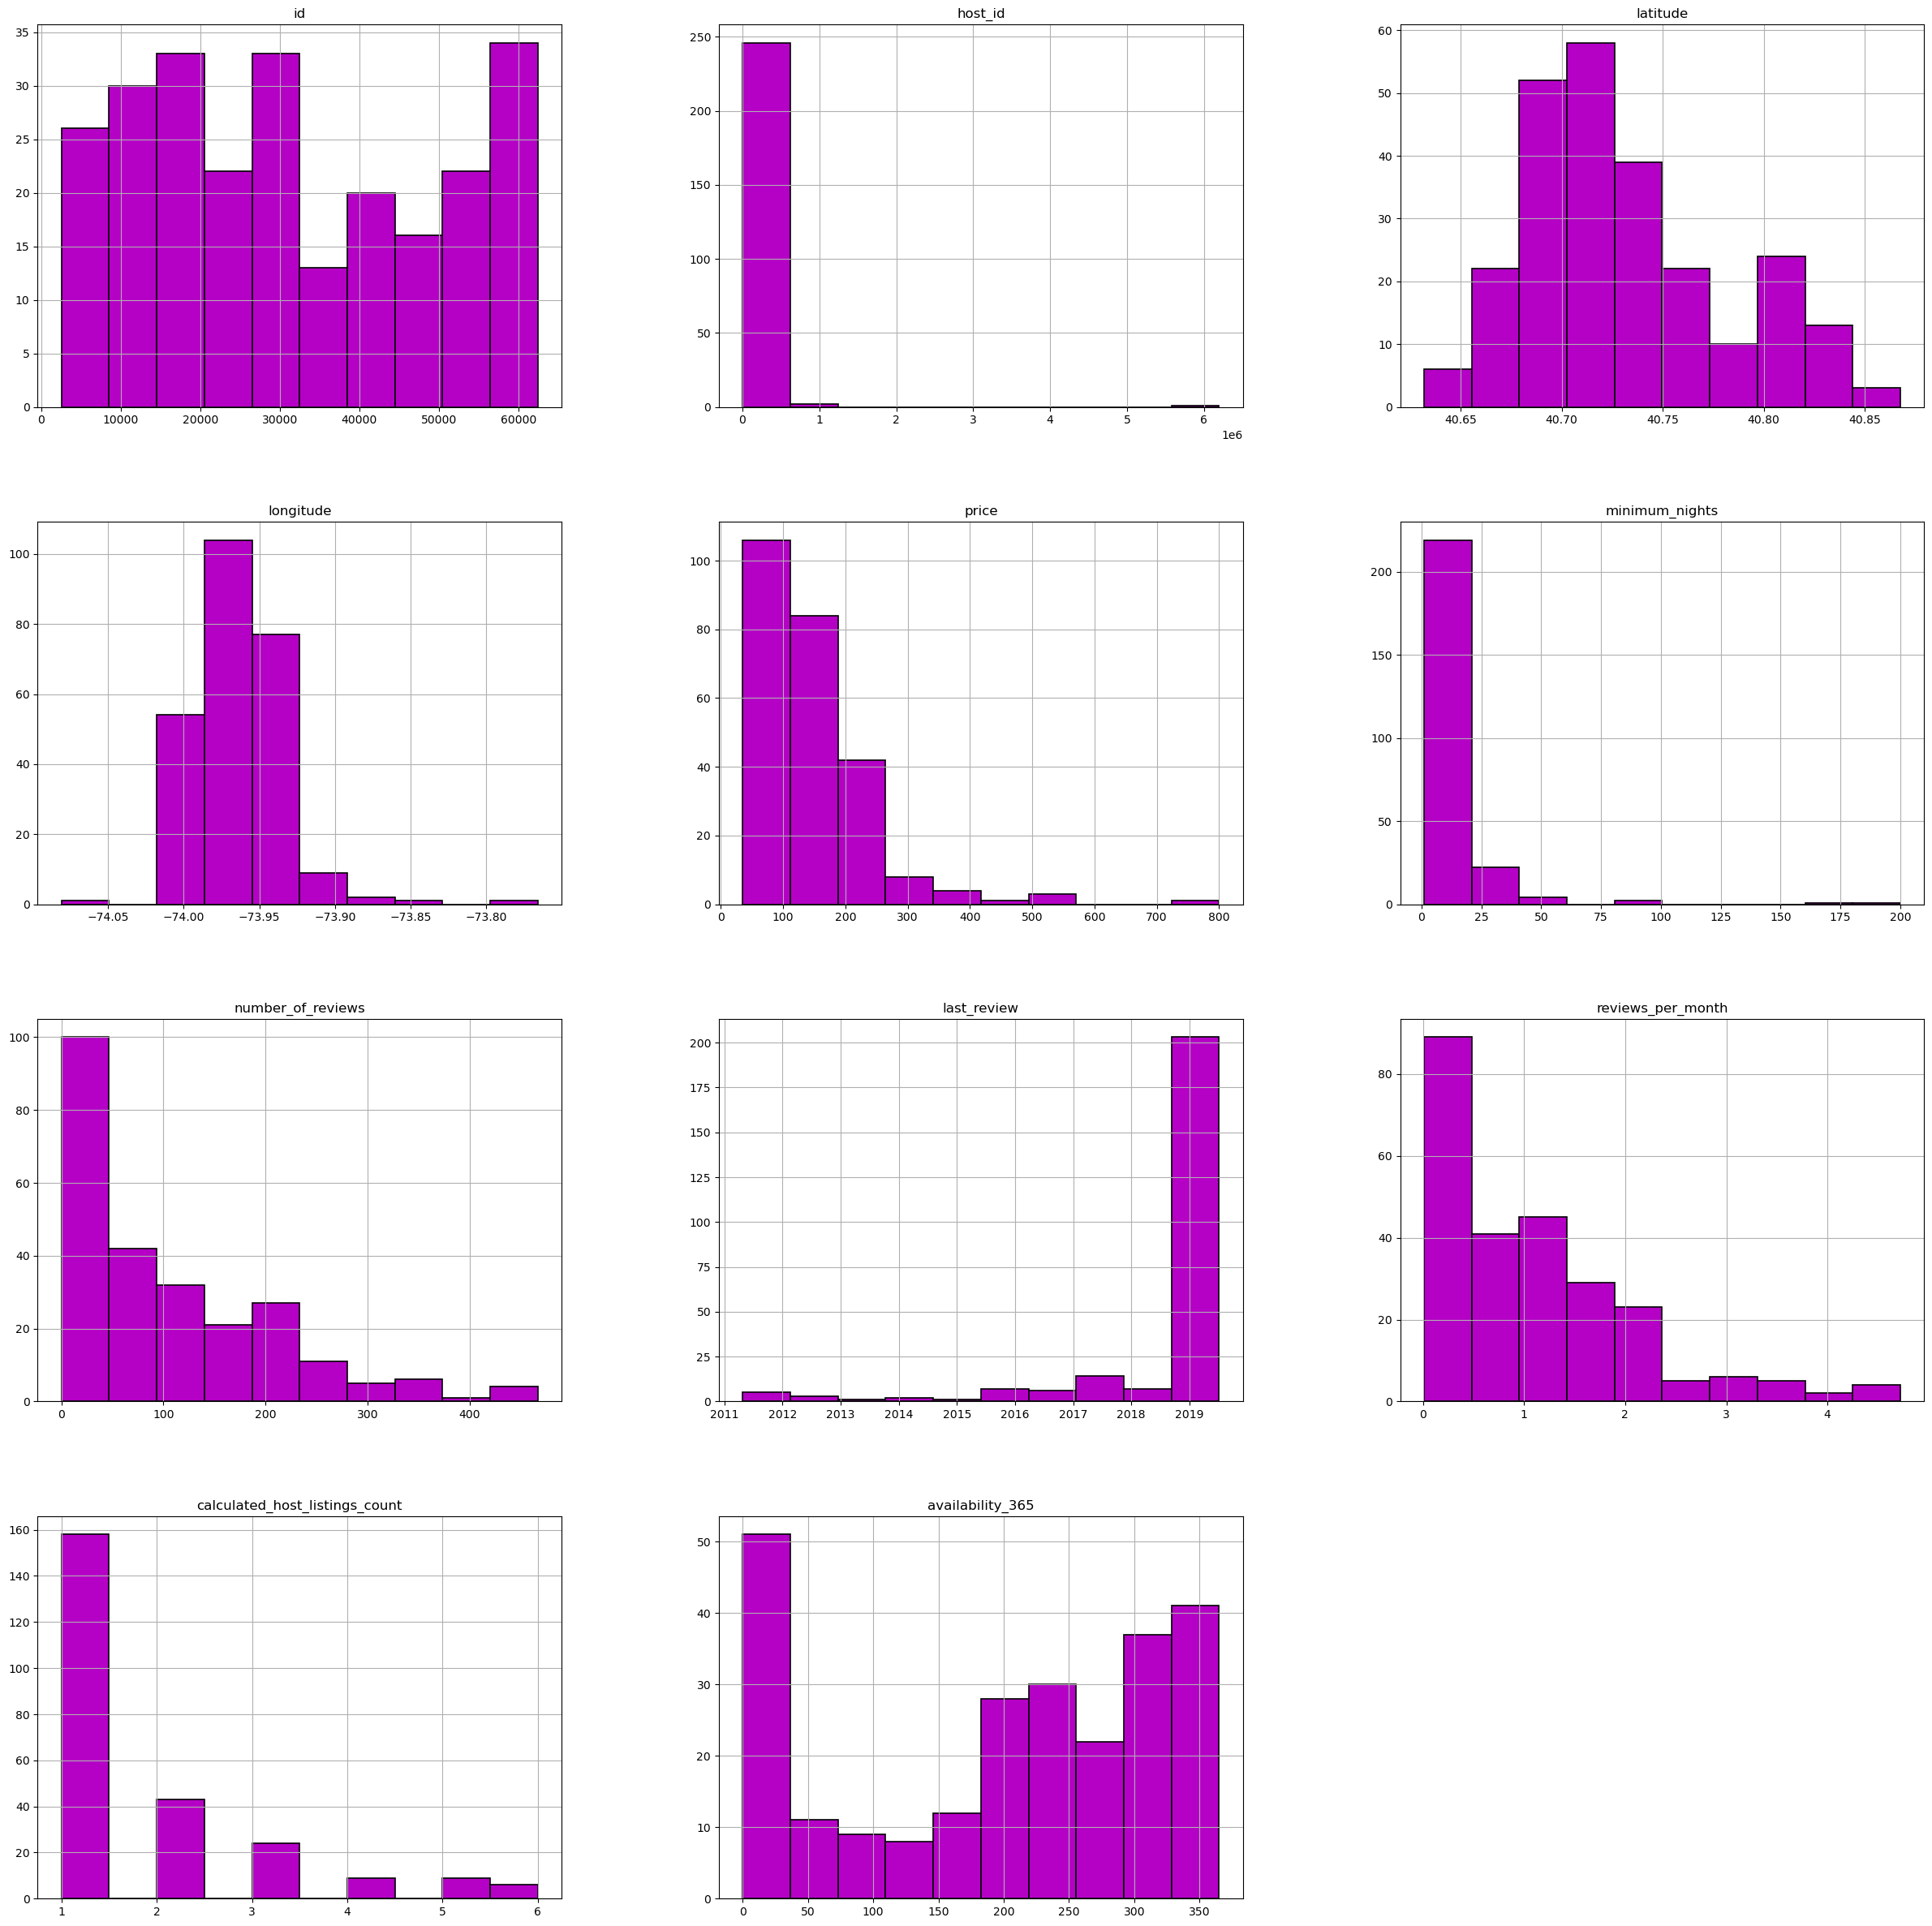

In [35]:
df1.hist(color='#b500c6', edgecolor="black", linewidth=1.2, figsize=(30, 30));

## 6. Pairplot

The below pair plot represents the correlation between all the features of dataset 1.
It has been observed that reviews_per_month and number of reviews columns have a positive correlation.

<Figure size 3000x3000 with 0 Axes>

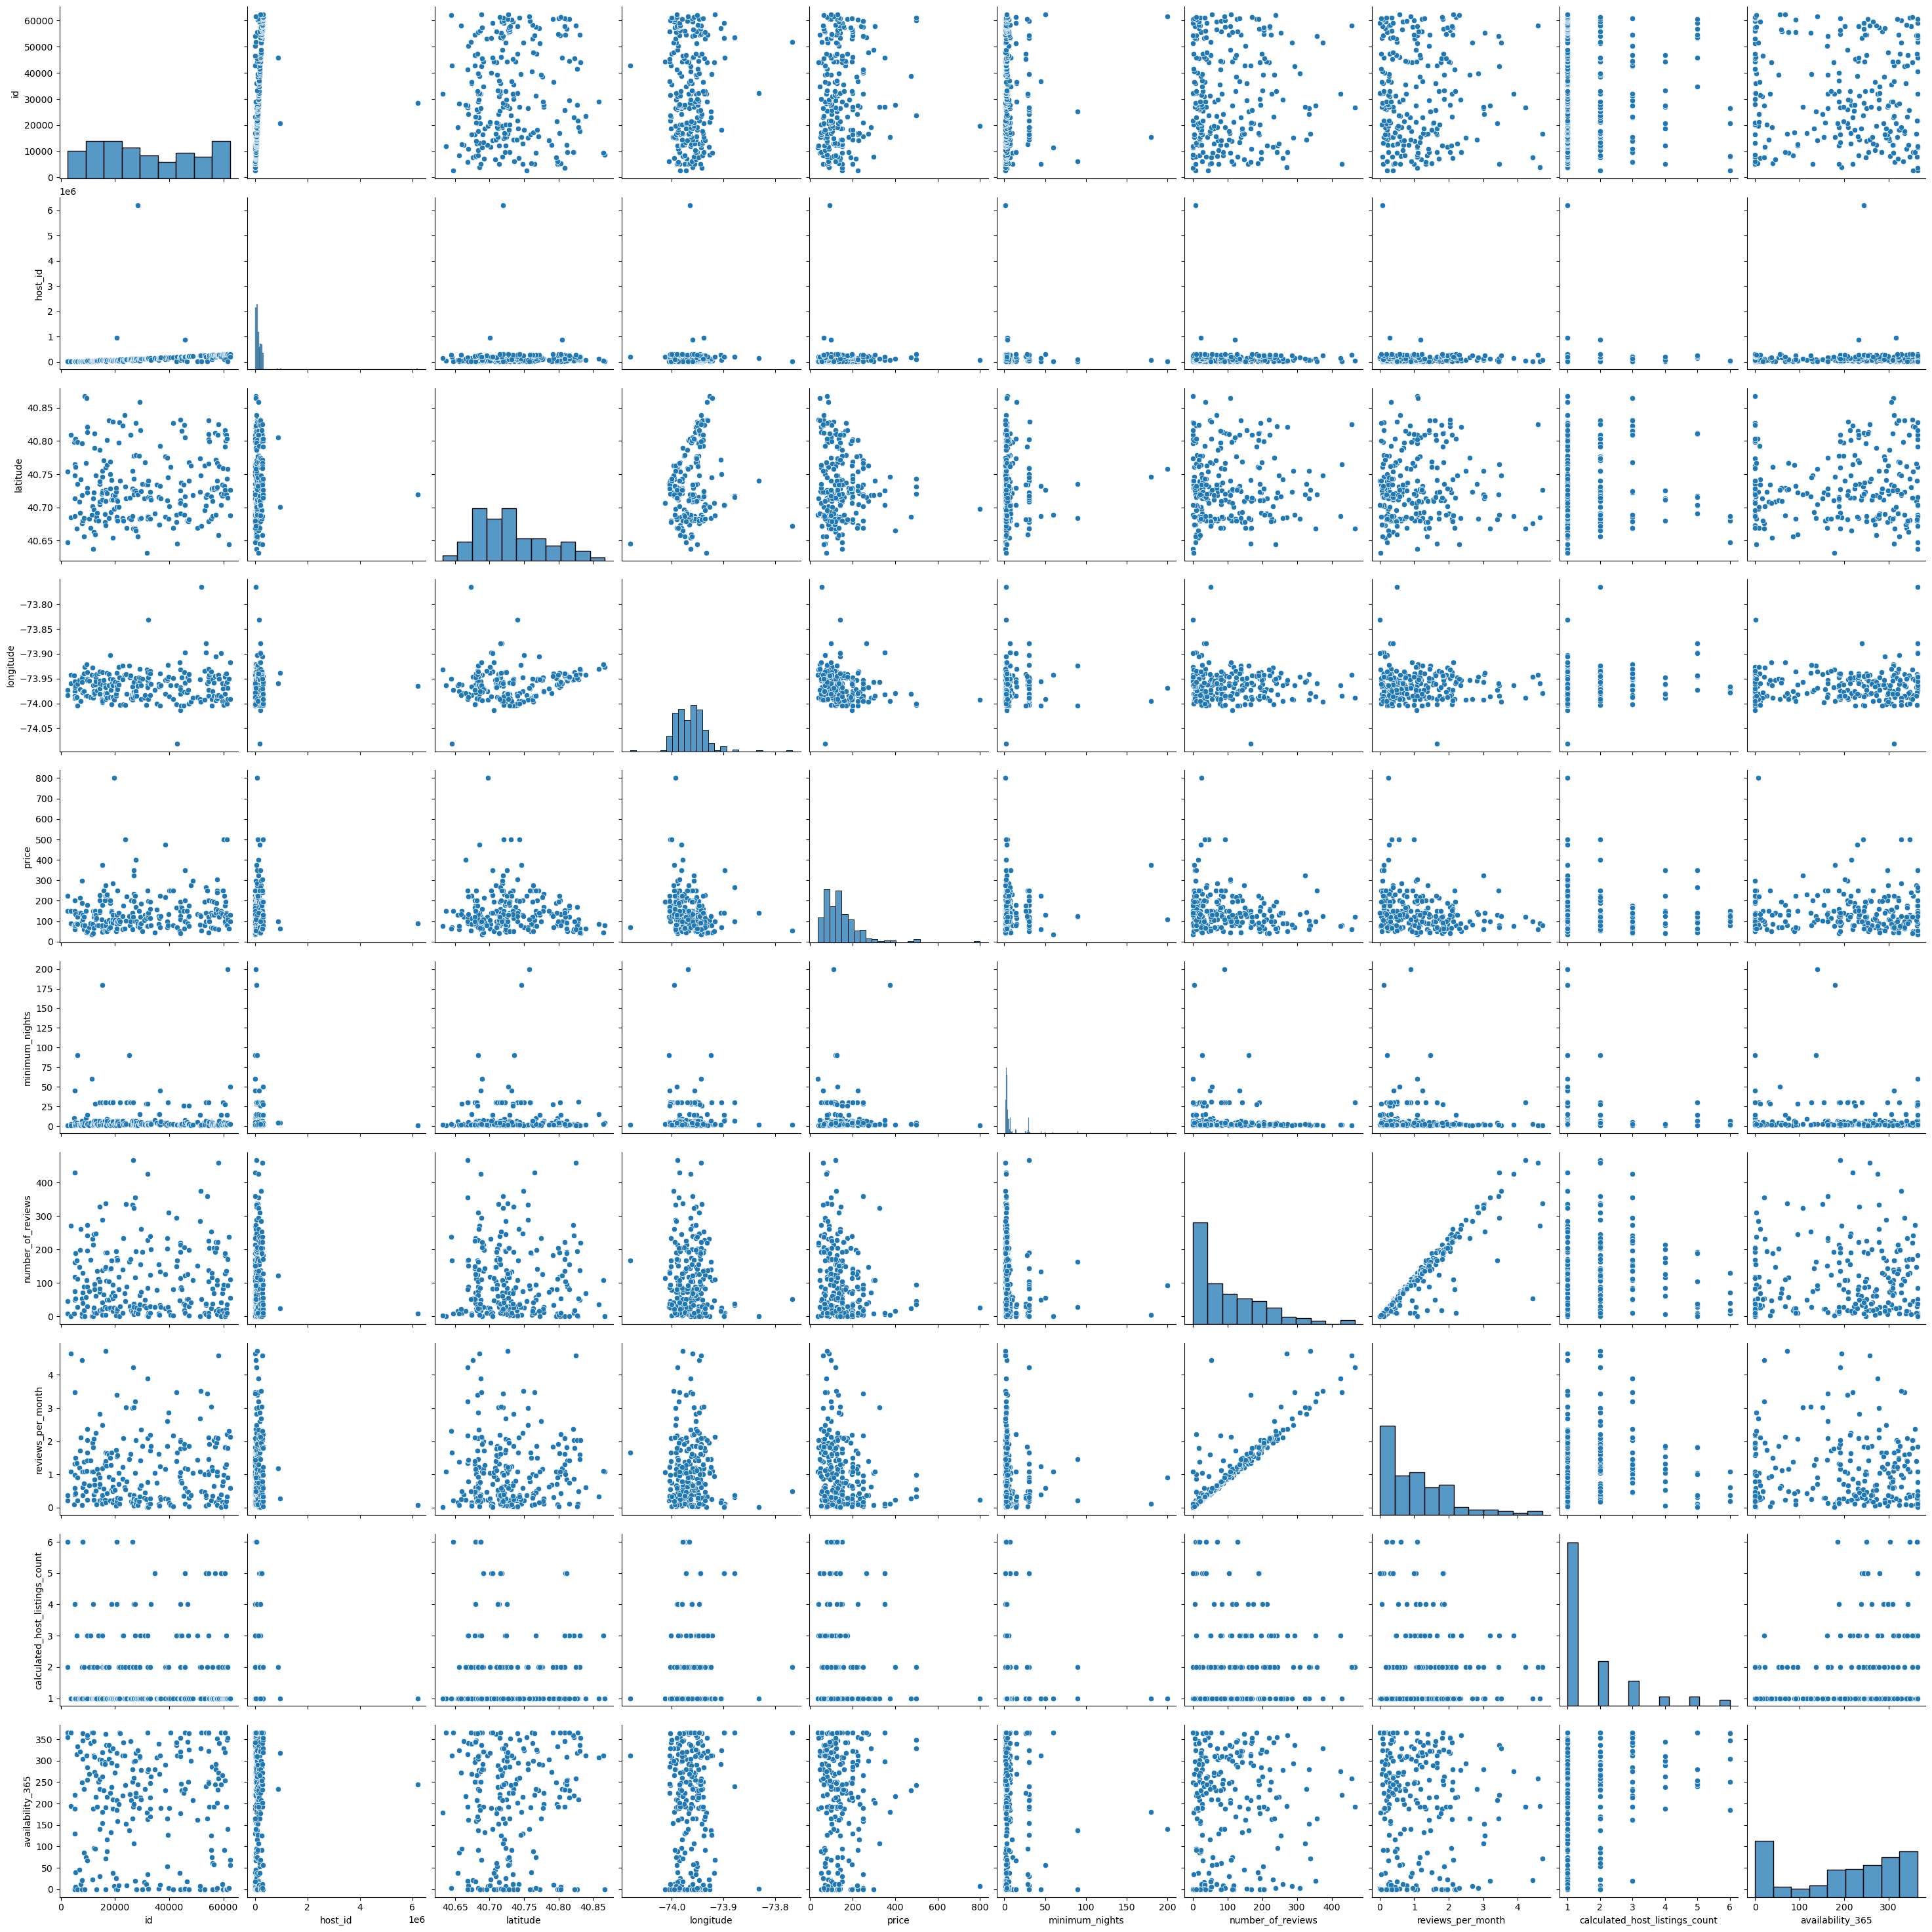

In [36]:
plt.figure(figsize=(30, 30))
sns.pairplot(df1, height=3, diag_kind="hist")

## 7. Correlation matrix

In [37]:
# correlation matrix
sns.set(font_scale=3)
plt.figure(figsize=(30, 20))
sns.heatmap(df1.corr(), annot=True)

<AxesSubplot:>

# Data Visualization of Dataset 2

## 1. Heat Map

Below heatmap shows the correlation between all the features of dataset 2.

In [43]:
plt.figure(figsize=(30,20))
sns.heatmap(df2.corr(),cmap="YlGnBu",annot=True)

<AxesSubplot:>

## 2. Catplot

The following catplot represents the frequency of people working in different departments based on their marital status. I has been observed that the highest number of people are working in production department irrespective of their marital status.

In [39]:
sns.catplot(x='MaritalDesc', hue='Department', data=df2, kind="count",height=15, aspect=1.5)

## 3. Countplot 

Below countplot represents the count of males and females working in different departments. 

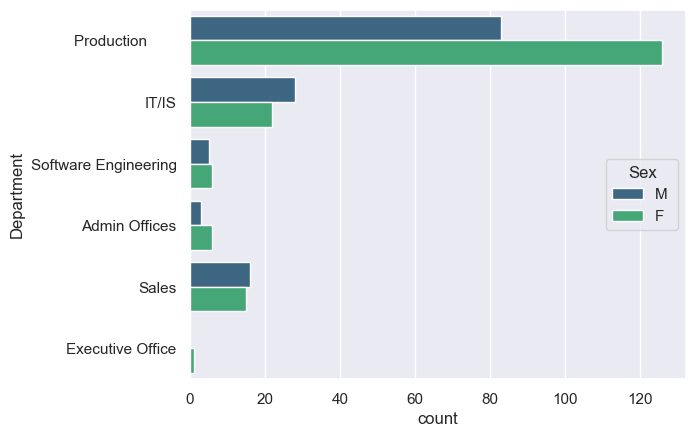

In [40]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(y='Department', data=df2, hue= 'Sex', palette='viridis')

## 4. Joint plot

This joint plot represents salaries based on the number of special project an employee has worked on. 

In [41]:
sns.jointplot(x='SpecialProjectsCount', y='Salary', data=df2, kind='reg', height=8, color='#78068f')

## 5. Sunburst Chart

The following sunburst chart represents the performance score of the employees in each department based on the gender.

In [42]:
fig = px.sunburst(df2, path=['Department', 'Sex', 'PerformanceScore'], values='Absences', color='PerformanceScore')
fig.show()